# Numpy and Pandas

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.DataFrame(np.arange(12).reshape((3,4)), columns=["a","b","c","d"])

In [16]:
# Count unique values
data.value_counts()
# Or more usefull per column
data["a"].value_counts()

8    1
4    1
0    1
Name: a, dtype: int64

## Making boxplot with re-binned x axis

In [17]:
house_df = pd.read_pickle("./data/houses.pkl")

In [18]:
y,bins = np.histogram(house_df.Year_Built, bins=20)
s = pd.DataFrame()

for idx in range(len(bins)-1):
    temp_df = house_df.query('Year_Built >= {0} & Year_Built < {1}'.format(bins[idx],bins[idx+1]))["SalePrice"]
    temp_df = temp_df.reset_index() # needed to have main index from zero
    temp_df["Year"] = int((bins[idx]+bins[idx+1])/2)
    s= s.append(temp_df) # appending histogrammed years
s = s.reset_index()
s = s.drop(["level_0","index"],axis=1)


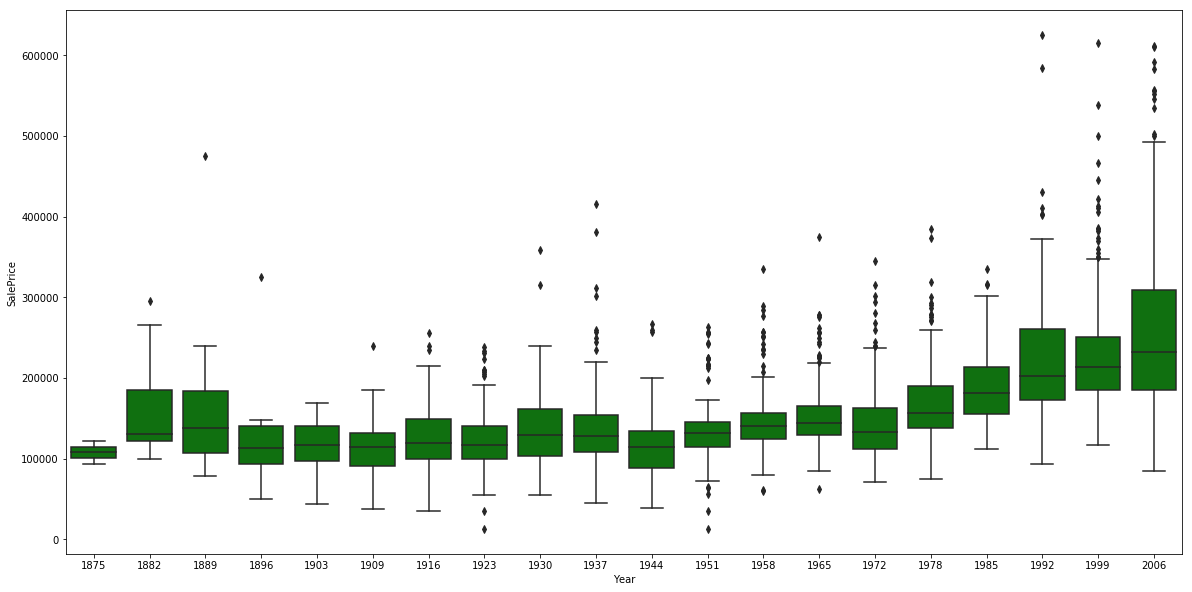

In [20]:
fig, ax1 = plt.subplots(figsize=(20,10))
sns.boxplot(x="Year",y="SalePrice",data=s, ax=ax1, color="green")

## One-Hot Encoding

In [24]:
# One hot encoding
#pd.get_dummies(....)